In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df=pd.read_csv(r"F:\DATA ANALSIS PRACTICE\House Price Prediction\Bengaluru_House_Data.csv")
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type').agg('count')

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


# DATA CLEANING

DROP COLUMNS

In [5]:
df1=df.drop(['availability','society','area_type','balcony'], axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

DROP THE ROWS WHICH CONTAINS 'NA/NaN' VALUES

In [7]:
df2= df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df2.shape

(13246, 5)

In [9]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df2['BHK']= df2['size'].apply(lambda x: int(x.split(" ")[0]))
df2.head()

<ipython-input-10-572f3de9649a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK']= df2['size'].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
 df2[df2.BHK>15]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [12]:
df2['total_sqft'].unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

CONVERT RANGE TO SINGLE VALUES USING AVG 

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df2[~df2["total_sqft"].apply(is_float)].head(10)  #(~) this sign returns values 

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
def convert_range_to_average_value(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+ float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
convert_range_to_average_value('2100')

2100.0

In [17]:
convert_range_to_average_value('1120-1145')

1132.5

In [18]:
convert_range_to_average_value('4125Perch')

In [19]:
df3= df2.copy()
df3["total_sqft"]=df3["total_sqft"].apply(convert_range_to_average_value)
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [20]:
df3.loc[188]

location      KR Puram
size             2 BHK
total_sqft      1277.5
bath               2.0
price             56.8
BHK                  2
Name: 188, dtype: object

# FEATURE ENGINEERING

In [21]:
df4= df3.copy()
df4['price_per_sqft']= df4['price']*100000/df4['total_sqft']
df4.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [22]:
(df4['location'].unique())

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [23]:
len((df4['location'].unique()))

1304

reduce dimentions by 'other' catagory

In [24]:
df4['location']=df4['location'].apply(lambda x: x.strip()) #if the data has extra space, it will remove that
len((df4['location'].unique()))


1293

In [25]:
location_stats=df4.groupby(['location'])['location'].agg('count')#location number for each location
location_stats=df4.groupby(['location'])['location'].agg('count').sort_values(ascending=False)#sort in decending order location number for each location
location_stats


location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [26]:
len(location_stats[location_stats<=10])
#how many location has less than 10 data points

1052

In [27]:
location_less_than_10_points=location_stats[location_stats<=10]
location_less_than_10_points #location that has less than 10 points

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [28]:
len(df4.location.unique())

1293

In [29]:
df4.location= df4.location.apply(lambda x: 'other'
                                if x in location_less_than_10_points
                                else x)
len(df4.location.unique())

#catagorize them into "others" if the location has less that 10 points

242

# Outlier remove

In [30]:
df4[df4.total_sqft/df4.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [31]:
df4.shape

(13246, 7)

In [32]:
#remove these data
df5= df4[~(df4.total_sqft/df4.BHK<300)]
df5.shape


(12502, 7)

In [33]:
13246-12502

744

In [34]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
def remove_outlier_of_pricePerSquareFit(df):
    df_out= pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean= np.mean(subdf.price_per_sqft)
        std= np.std(subdf.price_per_sqft)
        reducted_df= subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean+std))]
        df_out= pd.concat([df_out,reducted_df], ignore_index=True)
    return df_out
df6= remove_outlier_of_pricePerSquareFit(df5)
df6.shape


(10241, 7)

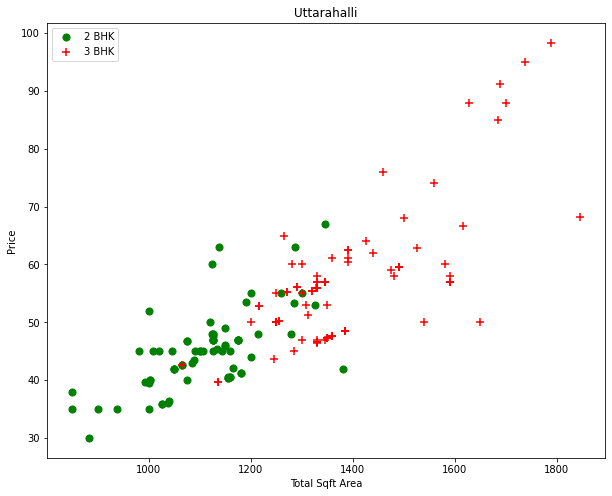

In [36]:
#comparing wheather 2 bedroom has high price than 3 bedroom in the same locaion
def plot_scatter_for2BHK_and_3BHK(df,location):
    BHK2= df[(df.location==location) & (df.BHK==2)]
    BHK3= df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams["figure.figsize"]=(10,8)
    plt.scatter(BHK2.total_sqft, BHK2.price, color='green', label='2 BHK', s=50)
    plt.scatter(BHK3.total_sqft, BHK3.price, marker='+' ,color='red', label='3 BHK', s=50)
    plt.xlabel("Total Sqft Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_for2BHK_and_3BHK(df6, 'Uttarahalli')
    
    

In [37]:
#for the same area 2 bhk should have less price than 3 bhk. thus, where the area is same but price of 2bhk is higer than
#3 bhk should remove from dataset. in this section we will do that
def remove_outlier_from_BHK(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        BHK_stats={}
        for BHK, BHK_df in location_df.groupby('BHK'):
            BHK_stats[BHK]= {
               "mean": np.mean(BHK_df.price_per_sqft),
                "std": np.std(BHK_df.price_per_sqft),
                "count": BHK_df.shape[0]
            }
        for BHK, BHK_df in location_df.groupby("BHK"):
            stats= BHK_stats.get(BHK-1)
            if stats and stats["count"]>5:
                exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exclude_indices, axis='index')

df7= remove_outlier_from_BHK(df6)
df7.shape
                

(7329, 7)

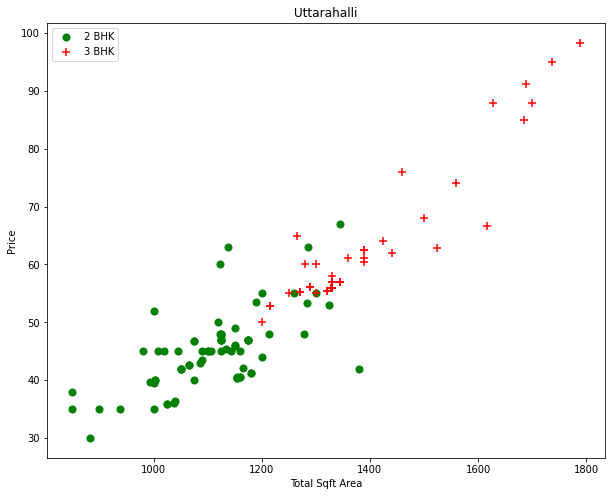

In [38]:
plot_scatter_for2BHK_and_3BHK(df7,"Uttarahalli")

Text(0, 0.5, 'Count')

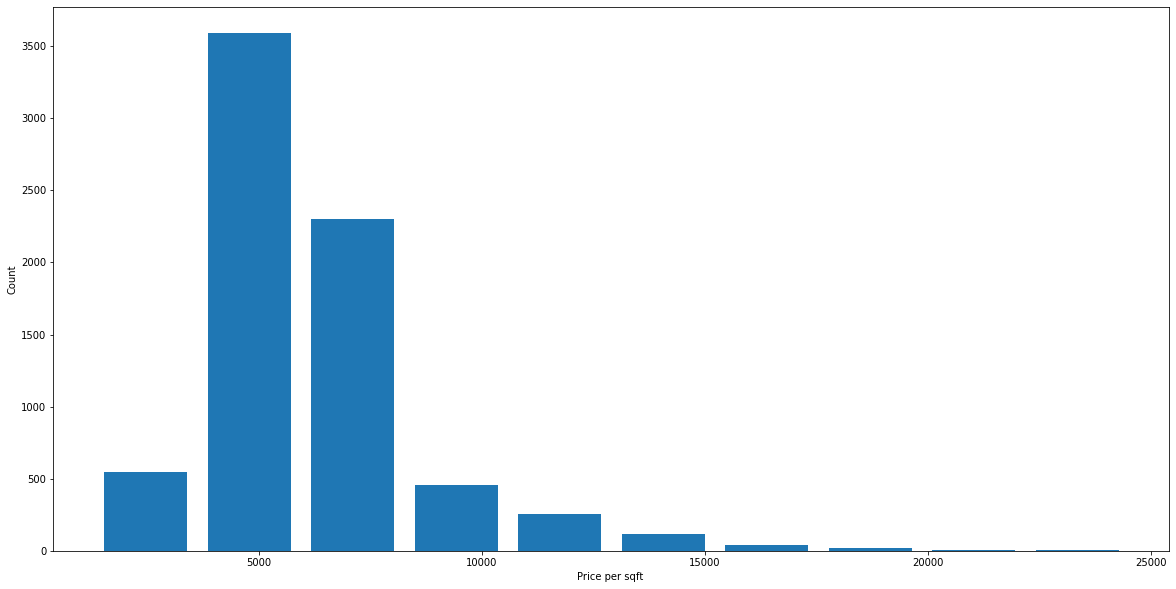

In [39]:
#plot histogam: how many apartment are available in per sqft area
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df7.price_per_sqft, rwidth=0.8)  #rwidth is for width of the bar
plt.xlabel("Price per sqft ")
plt.ylabel("Count")

In [40]:
#we are going to remove where the num of bath is more than num of 2 bedroom. 

df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [41]:
df7[df7.bath>8]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
3775,KR Puram,9 BHK,4600.0,9.0,200.0,9,4347.826087
5113,Mico Layout,9 BHK,5000.0,9.0,210.0,9,4200.000000
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5660,Raja Rajeshwari Nagar,9 Bedroom,3600.0,9.0,240.0,9,6666.666667
8026,other,11 BHK,5000.0,9.0,360.0,11,7200.000000
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
8761,other,9 BHK,4500.0,9.0,500.0,9,11111.111111
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000


Text(0, 0.5, 'Count')

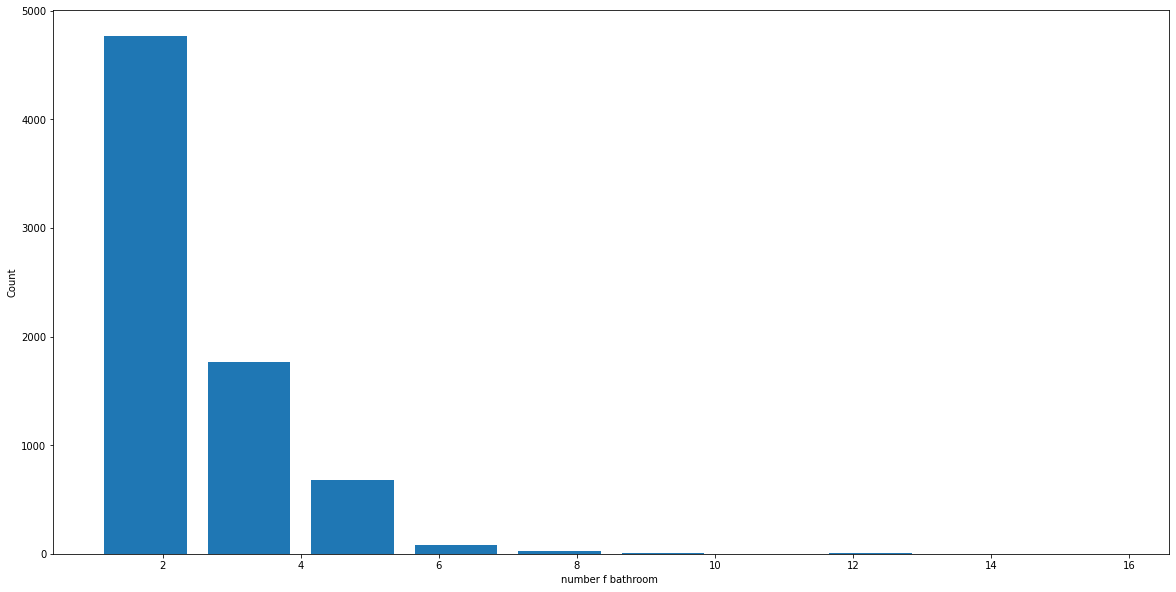

In [42]:
plt.hist(df7.bath, rwidth=0.8)  #rwidth is for width of the bar
plt.xlabel("number f bathroom ")
plt.ylabel("Count")

In [43]:
df7[df7.bath > df7.BHK+2]


,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [44]:
df8=df7[df7.bath < df7.BHK+2]
df8.shape

(7251, 7)

In [45]:
#drop 'size' & 'price per sqft' columns cause 'size' is already available and 'price per sqft' needed for outlier deduction
df9= df8.drop(['size','price_per_sqft'], axis='columns')
df9.head(10)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,210.0,3


# Model Building

ML model can not convert catagorical data. thus we have to convert it into numerical data. to do this we are going to apply one hot encoding which is also knwn as "dummies"

In [46]:
dummies= pd.get_dummies(df9.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#concating dummy columns with the main df
df10=pd.concat([df9,dummies.drop('other', axis='columns')], axis='columns')
df10.head(8)


,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,413.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,368.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,1875.0,3.0,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df11= df10.drop(['location'], axis='columns')
df11.head(5)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df11.shape

(7251, 245)

In [55]:
#as 'price' is our dependent variable. thus we drop it,because x variable represents all the indipendent variables
X= df11.drop(['price'],axis='columns')
X.head(5)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y= df11.price
y.head(5)

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split  #train data for model training and test data for model performance
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)  # random_state=10:If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.

#However, if a fixed value is assigned like random_state = 0 or 1 or 42 or any other integer then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.

# Create Linear Regression Model

In [62]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8452277697874102

# K-Fold Cross Validation

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

# GridSearchCV with hyperparameter tuning

In [72]:
from sklearn.model_selection import GridSearchCV #there are various regressor algorithms from which one gives best score

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


#function for GridSearchCV which gives best algorithm along with best perameter 
def best_model_using_GridSearchCV(X,y):
    algorithms= {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decisition tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
        
        
    }
    
    
    scores=[]
    cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algorithms.items():
        gs= GridSearchCV(config['model'], config['params'],cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score', 'best_params']) #return the result into a dataframe
best_model_using_GridSearchCV(X,y)


,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687478,"{'alpha': 2, 'selection': 'random'}"
2,decisition tree,0.726069,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


PREDICT PRICE


In [73]:
def predict_price(location, sqft, bath, bhk):
    loc_index= np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]= sqft
    x[1]= bath
    x[2]= bhk
    if loc_index>=0:
        x[loc_index]= 1
    return lr.predict([x])[0]

In [74]:
predict_price('Arekere', 1500, 3,3)

90.99239047284522

In [77]:
predict_price('Arekere', 1500, 4,4)

94.29853765310646

# export in a pickle file for flask server

In [78]:
import pickle
with open('House Price Prediction.pickle', 'wb') as f:
    pickle.dump(lr,f)

# export in Json file

In [79]:
import json
columns= {
    'data_columns': [col.lower() for col in X.columns]  #convert the column names into lower case
}
with open('House Price Prediction column names.json', 'w') as f:
    f.write(json.dumps(columns))